In [1]:
import math, random
import pandas as pd
#from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

import sys
sys.path.append(".")
from ImageData import *
from Functions import *

## **Loading Image DataSet**

In [2]:
# Load Data
X,y = LoadData(type="Array",use_PCA="False")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)


In [3]:
print("X_train length : ",len(X_train))
print("y_train Labels length {}  and unique lables are : {}".format(len(y_train),np.unique(y_train)))
print("X_test length : ",len(X_test))
print("y_test Labels length {}  and unique lables are : {}".format(len(y_test),np.unique(y_test)))

X_train length :  10031
y_train Labels length 10031  and unique lables are : [3 4 6]
X_test length :  4299
y_test Labels length 4299  and unique lables are : [3 4 6]


## **Run a Linear classifier on the training data set**
## **with 10-fold cross validation and without, mark the accuracies. Note also its accuracy on the test set.**
## **How well does the linear classifier generalize to new data?**
## **What hypothesis can you make about this data set being linearly separable or not?**

https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

## testing using Perceptron Linear Classifier

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

Perceptron_classifier = Perceptron(max_iter=1000, tol=1e-3,random_state=100,shuffle=True)
Perceptron_classifier.fit(X_train,y_train)

scores = cross_val_score(Perceptron_classifier, X_train, y_train)
print("Accuracy Score on Training Dataset = %0.2f  with standard deviation = %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(Perceptron_classifier, X_test, y_test)
print("Accuracy Score on Testing Dataset = %0.2f  with standard deviation = %0.2f" % (scores.mean(), scores.std()))

'''
y_pred = Perceptron_classifier.predict(X_test)
score = np.round(metrics.accuracy_score(y_test,y_pred),2)
print("Mean Accuracy Score on Testing DataSet : " , score)

y_pred = Perceptron_classifier.predict(X_train)
score = np.round(metrics.accuracy_score(y_train,y_pred),2)
print("Mean Accuracy Score on Training DataSet : " , score)
'''

Accuracy Score on Training Dataset = 0.43  with standard deviation = 0.03
Accuracy Score on Testing Dataset = 0.43  with standard deviation = 0.02


'\ny_pred = Perceptron_classifier.predict(X_test)\nscore = np.round(metrics.accuracy_score(y_test,y_pred),2)\nprint("Mean Accuracy Score on Testing DataSet : " , score)\n\ny_pred = Perceptron_classifier.predict(X_train)\nscore = np.round(metrics.accuracy_score(y_train,y_pred),2)\nprint("Mean Accuracy Score on Training DataSet : " , score)\n'

## Trying using SGD Classifier

In [176]:
from sklearn.linear_model import SGDClassifier
SGD_classifier = SGDClassifier(max_iter=1000, tol=1e-3 , shuffle=True , random_state=100)
SGD_classifier.fit(X_train,y_train)

scores = cross_val_score(SGD_classifier, X_train, y_train)
print("Accuracy Score on Training Dataset = %0.2f  with standard deviation = %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(SGD_classifier, X_test, y_test)
print("Accuracy Score on Testing Dataset = %0.2f  with standard deviation = %0.2f" % (scores.mean(), scores.std()))

Accuracy Score on Training Dataset = 0.41  with standard deviation = 0.02
Accuracy Score on Testing Dataset = 0.42  with standard deviation = 0.02


## Using 10 Folds : CV=10

In [5]:

Perceptron_classifier = Perceptron(max_iter=1000, tol=1e-3,random_state=100,shuffle=True)
Perceptron_classifier.fit(X_train,y_train)

scores = cross_val_score(Perceptron_classifier, X_train, y_train, cv=10)
print("Accuracy Score on Training Dataset = %0.2f  with standard deviation = %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(Perceptron_classifier, X_test, y_test, cv=10)
print("Accuracy Score on Testing Dataset = %0.2f  with standard deviation = %0.2f" % (scores.mean(), scores.std()))

Accuracy Score on Training Dataset = 0.43  with standard deviation = 0.03
Accuracy Score on Testing Dataset = 0.44  with standard deviation = 0.02


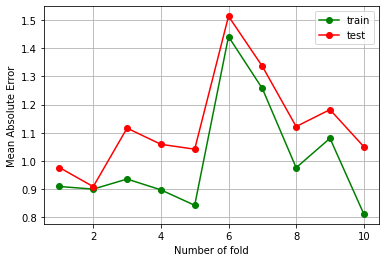

In [6]:
### Visualizing the Mean Absolute Error on Train and Test Data with 10 Folds
Test_Model_with_Folds(Perceptron_classifier, X, y, n_splits=10)

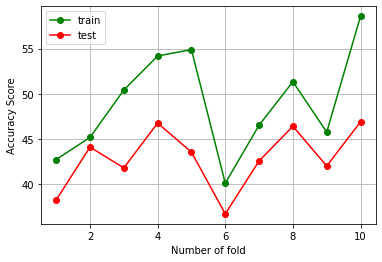

In [7]:
### Calculating Model Accuracy on different folds with 10 Folds
Test_Model_Accuracy_with_Folds(Perceptron_classifier, X, y, n_splits=10)

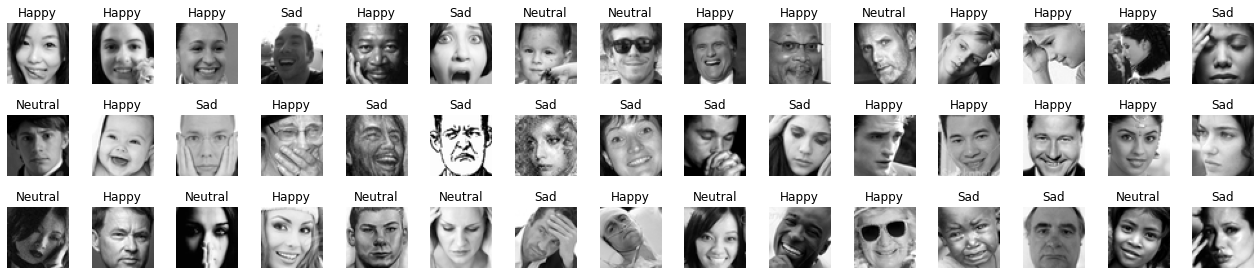

In [9]:
## Show images with their Predicted Labels:
y_pred = Perceptron_classifier.predict(X_test)
ShowRandomImages(X_test,y_pred)

In [10]:
## Test Values Count for each Value
np.asarray((np.unique(y_test, return_counts=True))).T

array([[   3, 1432],
       [   4, 1410],
       [   6, 1457]], dtype=int64)

In [11]:
## Predicted Values Count for each prediction
np.asarray((np.unique(y_pred, return_counts=True))).T

array([[   3, 1566],
       [   4, 1418],
       [   6, 1315]], dtype=int64)

In [ ]:
aaaaaaa

## **Multi Layer Perceptron - MLP**

In [16]:
from sklearn.neural_network import MLPClassifier

MLP_classifier = MLPClassifier(solver='lbfgs', activation='relu', learning_rate='invscaling' , alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=35, random_state=1) 

MLP_classifier.fit(X_train, y_train)

y_pred = MLP_classifier.predict(X_test)

score = np.round(metrics.accuracy_score(y_test,y_pred),2)
print("Mean Accuracy Score : " , score)

Mean Accuracy Score :  0.34


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'solver':['sgd'],
            'max_iter':[200],
            'hidden_layer_sizes':[(100),(50,20),(30,20,10),(30,20,10,2)],
            'validation_fraction': [0.1 , 0.3 , 0.5],
            'momentum': [0.1,0.5,0.9],
            'learning_rate': [0.01,0.001,0.0001],
            'activation': ['tanh', 'relu'],
            'learning_rate':['constant'],
            'alpha':[1e-5]
            }

MLP_classifier = MLPClassifier(verbose=True, random_state=100) 
grid_search = GridSearchCV(estimator=MLP_classifier, param_grid=param_grid, cv=2, verbose=True)
grid_search.fit(X_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: ", grid_search.best_params_)
final_model = grid_search.best_estimator_
print("Best Module is : " , final_model)


Fitting 2 folds for each of 72 candidates, totalling 144 fits
Iteration 1, loss = 1.21059834
Iteration 2, loss = 1.14582617
Iteration 3, loss = 1.11688068
Iteration 4, loss = 1.10899354
Iteration 5, loss = 1.11018399
Iteration 6, loss = 1.10362416
Iteration 7, loss = 1.10244328
Iteration 8, loss = 1.09539926
Iteration 9, loss = 1.10261745
Iteration 10, loss = 1.09367454
Iteration 11, loss = 1.08886522
Iteration 12, loss = 1.09899313
Iteration 13, loss = 1.09487500
Iteration 14, loss = 1.09310894
Iteration 15, loss = 1.09471541
Iteration 16, loss = 1.09255292
Iteration 17, loss = 1.09262987
Iteration 18, loss = 1.09353304
Iteration 19, loss = 1.09053092
Iteration 20, loss = 1.09195809
Iteration 21, loss = 1.09090615
Iteration 22, loss = 1.08915038
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.24074116
Iteration 2, loss = 1.18042082
Iteration 3, loss = 1.15180198
Iteration 4, loss = 1.14109133
Iteration 5, loss = 1.1263524

## Testing with different parameters

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'solver':['sgd'],
            'max_iter':[200],
            'hidden_layer_sizes':[(20),(20,10),(20,10,5)],
            'validation_fraction': [0.1],# , 0.3 , 0.5],
            'momentum': [0.9],#0.1,0.5,0.9],
            'learning_rate': [0.1], #0.01,0.001,0.0001],
            'activation': ['relu'], # 'tanh', 'relu'],
            'learning_rate':['constant'],
            'alpha':[1e-5]
            }

MLP_classifier = MLPClassifier(verbose=False, random_state=100) 
grid_search = GridSearchCV(estimator=MLP_classifier, param_grid=param_grid, cv=2, verbose=False)
grid_search.fit(X_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: ", grid_search.best_params_)
#final_model = grid_search.best_estimator_
print("Best Module is : " , grid_search.best_estimator_)


Best cross-validation score: 0.334
Best parameters:  {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'max_iter': 200, 'momentum': 0.9, 'solver': 'sgd', 'validation_fraction': 0.1}
Best Module is :  MLPClassifier(alpha=1e-05, hidden_layer_sizes=20, random_state=100,
              solver='sgd')


## another Test using hidden layer size 500 and some other parameters

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'solver':['sgd'],
            'max_iter':[200],
            'hidden_layer_sizes':[(500)],
            'validation_fraction': [0.1],# , 0.3 , 0.5],
            'momentum': [0.9],#0.1,0.5,0.9],
            'learning_rate': [0.001], #0.01,0.001,0.0001],
            'activation': ['tanh'], # 'tanh', 'relu'],
            'learning_rate':['constant'],
            'alpha':[1e-5]
            }

MLP_classifier = MLPClassifier(verbose=False, random_state=100) 
grid_search = GridSearchCV(estimator=MLP_classifier, param_grid=param_grid, cv=2, verbose=False)
grid_search.fit(X_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: ", grid_search.best_params_)
#final_model = grid_search.best_estimator_
print("Best Module is : " , grid_search.best_estimator_)

Best cross-validation score: 0.337
Best parameters:  {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': 500, 'learning_rate': 'constant', 'max_iter': 200, 'momentum': 0.9, 'solver': 'sgd', 'validation_fraction': 0.1}
Best Module is :  MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=500,
              random_state=100, solver='sgd')


In [38]:
''' Took 28 min
Best cross-validation score: 0.359
Best parameters:  {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 200, 'momentum': 0.5, 'solver': 'sgd', 'validation_fraction': 0.1}
Best Module is :  MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=100,
              momentum=0.5, random_state=42, solver='sgd', verbose=True)
'''

#Training the model on Best Model returned
MLP_classifier = final_model
MLP_classifier.fit(X_train, y_train)

y_pred_Train = MLP_classifier.predict(X_train)
y_pred_Test = MLP_classifier.predict(X_test)

# Model Accuracy
print("Accuracy on Training Datase  : ",metrics.accuracy_score(y_train, y_pred_Train))
print("Accuracy on Testing DataSet  : ",metrics.accuracy_score(y_test, y_pred_Test))

Iteration 1, loss = 1.18345124
Iteration 2, loss = 1.11700022
Iteration 3, loss = 1.10767208
Iteration 4, loss = 1.09908288
Iteration 5, loss = 1.09953631
Iteration 6, loss = 1.09595625
Iteration 7, loss = 1.09413283
Iteration 8, loss = 1.09646665
Iteration 9, loss = 1.09763438
Iteration 10, loss = 1.09579752
Iteration 11, loss = 1.09420820
Iteration 12, loss = 1.09358880
Iteration 13, loss = 1.09481076
Iteration 14, loss = 1.09294082
Iteration 15, loss = 1.09334422
Iteration 16, loss = 1.09406607
Iteration 17, loss = 1.09119005
Iteration 18, loss = 1.09033599
Iteration 19, loss = 1.09050677
Iteration 20, loss = 1.09036547
Iteration 21, loss = 1.09203449
Iteration 22, loss = 1.09079814
Iteration 23, loss = 1.09117875
Iteration 24, loss = 1.08937556
Iteration 25, loss = 1.08785760
Iteration 26, loss = 1.09118054
Iteration 27, loss = 1.09012446
Iteration 28, loss = 1.09173945
Iteration 29, loss = 1.09223347
Iteration 30, loss = 1.09307250
Iteration 31, loss = 1.09429746
Iteration 32, los

## **CNN**

## using Keras

In [230]:
# Load Data
X,y = LoadData(type="Array",use_PCA="False")

X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)

In [232]:
X_train.shape

(10031, 2304)

In [233]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils


# Creating the input vector of type 48x48
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)


In [234]:
print(X_train.shape)

(10031, 48, 48, 1)


### Covert data to Float type and Normalize it by rescaling the pixel values in range 0 - 1

In [235]:
X_train = X_train.astype('float32')
X_train = X_train / 255

X_test = X_test.astype('float32')
X_test = X_test / 255

In [237]:
print("new Normalized data : ",X_train[0])



new Normalized data :  [[[0.02352941]
  [0.02745098]
  [0.02352941]
  ...
  [0.99215686]
  [0.9843137 ]
  [0.8784314 ]]

 [[0.01176471]
  [0.01568628]
  [0.01960784]
  ...
  [0.98039216]
  [0.9882353 ]
  [0.90588236]]

 [[0.01176471]
  [0.01176471]
  [0.01176471]
  ...
  [1.        ]
  [0.972549  ]
  [0.8352941 ]]

 ...

 [[0.07058824]
  [0.0627451 ]
  [0.05882353]
  ...
  [0.36862746]
  [0.3882353 ]
  [0.5294118 ]]

 [[0.07058824]
  [0.0627451 ]
  [0.0627451 ]
  ...
  [0.3372549 ]
  [0.4117647 ]
  [0.49803922]]

 [[0.06666667]
  [0.0627451 ]
  [0.0627451 ]
  ...
  [0.36078432]
  [0.42352942]
  [0.54509807]]]


### Lets convert the class labels into one hot encoding vector where each image will have dimention of 1x

In [239]:
classes = np.unique(y_train)
print("Classes = ", classes)
classes_count = len(classes)  ### 3 classes since i have  Happy / Sad / Neutral
print("Class count : ", classes_count)

Classes =  [3 4 6]
Class count :  3


In [244]:

print("y_train before applying One Hot encoding : ", y_train.shape)
print("y_test before applying One Hot encoding : ", y_test.shape)

y_train_New = np_utils.to_categorical(y_train,7)
y_test_New = np_utils.to_categorical(y_test,7)
print("y_train after applying One Hot encoding : ", y_train_New.shape)
print("y_test after applying One Hot encoding : ", y_test_New.shape)

y_train before applying One Hot encoding :  (10031,)
y_test before applying One Hot encoding :  (4299,)
y_train after applying One Hot encoding :  (10031, 7)
y_test after applying One Hot encoding :  (4299, 7)


In [260]:
import keras

# passing a list of layers and a single convolution layer
model = Sequential([
                keras.layers.Conv2D(20, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(48,48,1)),
                keras.layers.MaxPool2D(pool_size=(1,1)),
                keras.layers.Flatten(),
                keras.layers.Dense(100, activation='relu'),
                keras.layers.Dense(7, activation='softmax')
                ])

# compiling my Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

### Testing with 10 epochs
model.fit(X_train, y_train_New, batch_size=128, epochs=10, validation_data=(X_test, y_test_New))

Epoch 1/10
79/79 [==============================] - 14s 172ms/step - loss: 1.1383 - accuracy: 0.4464 - val_loss: 0.9575 - val_accuracy: 0.5450
Epoch 2/10
79/79 [==============================] - 11s 145ms/step - loss: 0.8870 - accuracy: 0.5910 - val_loss: 0.9458 - val_accuracy: 0.5559
Epoch 3/10
79/79 [==============================] - 11s 145ms/step - loss: 0.7975 - accuracy: 0.6518 - val_loss: 0.9063 - val_accuracy: 0.5883
Epoch 4/10
79/79 [==============================] - 18s 230ms/step - loss: 0.7211 - accuracy: 0.6938 - val_loss: 0.9179 - val_accuracy: 0.5860
Epoch 5/10
79/79 [==============================] - 11s 143ms/step - loss: 0.6608 - accuracy: 0.7285 - val_loss: 0.9352 - val_accuracy: 0.5804
Epoch 6/10
79/79 [==============================] - 14s 179ms/step - loss: 0.5862 - accuracy: 0.7653 - val_loss: 0.9785 - val_accuracy: 0.5699
Epoch 7/10
79/79 [==============================] - 18s 231ms/step - loss: 0.5285 - accuracy: 0.7969 - val_loss: 1.0130 - val_accuracy: 0.5769